# Init config

## Connect with google drive

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

## Functions

In [ ]:
import numpy as np

def save_model(i):
  model_save_name = 'classifier_'+str(i)+'.pt'
  print("saving..." + model_save_name)
  save_path_aux = SAVE_PATH + "{model_save_name}"
  path = F"{SAVE_PATH}{model_save_name}" 
  torch.save(model.state_dict(), path)

import pandas as pd

def create_dataframe():
  lst = {"epoch":[],
         "train_loss":[],
         "test_loss":[],
         "acc_training":[],
         "acc_testing":[],
         "acc_benign ":[],
         "acc_malign":[]}

  return pd.DataFrame(lst)

def create_row(epoch, tr_loss, ts_loss, acc_training, acc_testing,acc_benign,acc_malign):
  return {"epoch":epoch,
          "train_loss":tr_loss,
          "test_loss":ts_loss,
          "acc_training":acc_training,
          "acc_testing":acc_testing,
          "acc_benign ":acc_benign,
         "acc_malign":acc_malign}

def create_model_info(model):
  f= open(SAVE_PATH+"model_info.txt","w+")
  f.write(str(model))
  f.close()

import matplotlib.pyplot as plt


def make_graph(df):
  ax = plt.gca()

  df.plot(kind='line',x='epoch',y='train_loss', color='green', ax=ax)
  df.plot(kind='line',x='epoch',y='test_loss', color='red', ax=ax)
  #df.plot(kind='line',x='epoch',y='accuracy', ax=ax)


  plt.show()

  fig = plt.gcf()
  plt.close(fig) 

  ax = plt.gca()

  df.plot(kind='line',x='epoch',y='acc_training',color="green",ax=ax)
  df.plot(kind='line',x='epoch',y='acc_testing',color="blue",ax=ax)

  plt.show()

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)), interpolation='nearest')

# Pytorch

In [ ]:
import torch
import torch.nn.functional as F # Para usar linear.
import torchvision as tv 
import torchvision.transforms as transforms

## Load with pytorch

In [ ]:
B = 5
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

root_path = "/content/drive/My Drive/colab_notebooks/data/sample/train/"

train_dataset = tv.datasets.ImageFolder(
    root= root_path,
    transform=transform)

train_loader = torch.utils.data.DataLoader(
    dataset=train_dataset,
    batch_size = B,
    num_workers = 2,
    shuffle=True)

root_path = "/content/drive/My Drive/colab_notebooks/data/me/test/"

test_dataset = tv.datasets.ImageFolder(
    root= root_path,
    transform=transform)

test_loader = torch.utils.data.DataLoader(
    dataset=test_dataset,
    batch_size = B,
    num_workers = 2,
    shuffle=True)

classes = ('benign','malignant')
C = len(classes)

print ('Trainning batch number: {}'.format(len(train_loader)))
print ('Testing batch number: {}'.format(len(test_loader)))

Trainning batch number: 541
Testing batch number: 1


## View sample

IndexError: ignored

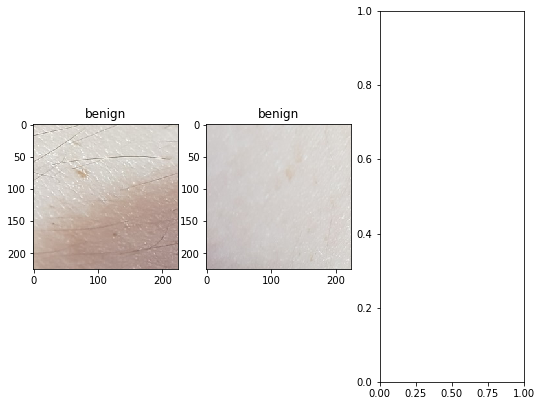

In [ ]:


# # Display first 15 images of moles, and how they are classified
w=60
h=40
fig=plt.figure(figsize=(15, 15))
columns = 5
rows = 2

dataiter = iter(test_loader)

images, labels = dataiter.next()

for i in range(1, columns*rows+1):
    ax = fig.add_subplot(rows, columns, i)    
    ax.title.set_text(classes[labels[i-1]])
    imshow(images[i-1])
plt.show()

# Model Convolutional neural network

### model1

In [ ]:
import torch
import torchvision as tv
import torch.nn.functional as F

class ConvNet(torch.nn.Module):
  def __init__( _, num_classes):
    super().__init__()
    _.conv1 = torch.nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1)
    _.conv2 = torch.nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
    _.conv3 = torch.nn.Conv2d(128, 512, kernel_size=3, stride=1, padding=1)
    _.conv4 = torch.nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1)
    _.conv5 = torch.nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1)

    _.mpool = torch.nn.MaxPool2d(kernel_size=2, stride=2)
    _.dropout = torch.nn.Dropout2d(0.5)
    _.fc1 = torch.nn.Linear(512*7*7, 4096)
    _.fc2 = torch.nn.Linear(4096, num_classes)
    
  def forward(_, x): #[B, 16, 224, 224 ]
    out = _.conv1(x).relu()
    out = _.mpool(out)
    out = _.conv2(out).relu()
    out = _.mpool(out)
    out = _.conv3(out).relu()
    out = _.mpool(out)
    out = _.conv4(out).relu()
    out = _.mpool(out)
    out = _.conv5(out).relu()
    out = _.mpool(out)
    out = _.dropout(out)
    out = out.view(-1, 512*7*7)
    out = _.fc1(out).relu()
    
    y = _.fc2(out).tanh()

    return y

In [ ]:
    idata = iter( test_loader)
    image, label = next( idata)

    mpool = torch.nn.MaxPool2d(kernel_size=2, stride=2)
    
    conv1 = torch.nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1)
    out = conv1(image)
    print(out.shape)
    out = mpool(out)
    print(out.shape)
    conv2 = torch.nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
    out = conv2(out)
    print(out.shape)
    out = mpool(out)
    print(out.shape)
    conv3 = torch.nn.Conv2d(128, 512, kernel_size=3, stride=1, padding=1)
    out = conv3(out)
    print(out.shape)
    out = mpool(out)
    print(out.shape)
    conv4 = torch.nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1)
    out= conv4(out)
    print(out.shape)
    out = mpool(out)
    print(out.shape)
    conv5 = torch.nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1)
    out = conv5(out)
    print(out.shape)
    out = mpool(out)
    print(out.shape)
    mpool = torch.nn.MaxPool2d(kernel_size=2, stride=2)

torch.Size([10, 64, 224, 224])
torch.Size([10, 64, 112, 112])
torch.Size([10, 128, 112, 112])
torch.Size([10, 128, 56, 56])
torch.Size([10, 512, 56, 56])
torch.Size([10, 512, 28, 28])
torch.Size([10, 512, 28, 28])
torch.Size([10, 512, 14, 14])
torch.Size([10, 512, 14, 14])
torch.Size([10, 512, 7, 7])


## Train

In [ ]:
SAVE_PATH = "/content/drive/My Drive/colab_notebooks/data/models/model11/model-"

In [ ]:
LR = 0.000001
T = 70

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

model = ConvNet(C).to(device)
optim = torch.optim.Adam(model.parameters(), lr=LR)
costf = torch.nn.CrossEntropyLoss()

create_model_info(model)

empty = {"learning_rate":[],
        "batch": [],
        "Epochs":[] }
row = {"learning_rate":LR,
        "batch": B,
        "Epochs": T}

df = pd.DataFrame(empty)
df = df.append(row,  ignore_index=True)
df.to_csv(SAVE_PATH+"parameters.csv")

df = create_dataframe()

train_loss = 0
test_loss = 0
accuracy = 0

for t in range(T):
  #TRAIN
  model.train()
  run_loss = 0
  j = 0
  correct = 0
  total = 0

  for i, (images, labels) in enumerate(train_loader):
    images = images.to(device)
    labels = labels.to(device)

    optim.zero_grad()

    output = model(images)
    error = costf(output, labels)
     
    error.backward()
    optim.step()

    #print statistics 
    run_loss += error.item()
    j += 1

    _, predicted = torch.max(output.data, 1) 
    correct += (predicted == labels).sum().item()
    total += labels.size(0)

    if(i+1)%10 == 0: 
      print ( "------Epoch [{}/{}], Batch [{}], Loss: {:.4f}"
        .format( t+1, T, i+1, error.item())) 
    

  train_loss = run_loss/j
  acc_training = correct/total
  
  print( "Accuracy training: {} %".format(100*correct/total))
  print ( "Training - Epoch [{}/{}], Loss: {:.4f}"
    .format( t+1, T, train_loss)) 
      

  if(t>60):
    save_model(t)
  #TEST
  class_correct = list(0. for i in range(2))
  class_total = list(0. for i in range(2))

  model.eval()    
  with torch.no_grad():
    correct = 0
    total = 0
    run_loss = 0
    j = 0

    for images, labels in test_loader:
      images = images.to(device)
      labels = labels.to(device)

      output = model(images)
      error = costf(output, labels)

      run_loss += error.item()
      j += 1

      #print statistics 
      _, predicted = torch.max(output.data, 1) 
      correct += (predicted == labels).sum().item()
      c = (predicted == labels).squeeze()
      total += labels.size(0)
      for i in range(2):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

    test_loss = run_loss/j
    acc_testing = correct/total
    print ( "Testing - Epoch [{}/{}], Loss: {:.4f}"
      .format( t+1, T,  test_loss)) 
      

    print( "Accuracy test: {} %".format(100*correct/total))

  for i in range(2):
    print('Testing - Accuracy of %5s : %2d %%' % (
      classes[i], 100 * class_correct[i] / class_total[i])) 
    
  acc_benign  = class_correct[0] / class_total[0]
  acc_malign  = class_correct[1] / class_total[1]

  df = df.append(create_row(t, train_loss, test_loss, acc_training, acc_testing,acc_benign, acc_malign), ignore_index=True)

  if((acc_benign>0.87 and acc_malign>0.87) or acc_testing>0.85):
    save_model(t)
    print("MODEL SAVED")

  make_graph(df)

df.to_csv(SAVE_PATH+"report.csv")

------Epoch [70/70], Batch [10], Loss: 0.2272
------Epoch [70/70], Batch [20], Loss: 0.4432
------Epoch [70/70], Batch [30], Loss: 0.3311
------Epoch [70/70], Batch [40], Loss: 0.2860
------Epoch [70/70], Batch [50], Loss: 0.1725
------Epoch [70/70], Batch [60], Loss: 0.4520
------Epoch [70/70], Batch [70], Loss: 0.2375
------Epoch [70/70], Batch [80], Loss: 0.3699
------Epoch [70/70], Batch [90], Loss: 0.4285
------Epoch [70/70], Batch [100], Loss: 0.4574
------Epoch [70/70], Batch [110], Loss: 0.2494
------Epoch [70/70], Batch [120], Loss: 0.2637
------Epoch [70/70], Batch [130], Loss: 0.3662
------Epoch [70/70], Batch [140], Loss: 0.5028
------Epoch [70/70], Batch [150], Loss: 0.7012
------Epoch [70/70], Batch [160], Loss: 0.2228
------Epoch [70/70], Batch [170], Loss: 0.4233
------Epoch [70/70], Batch [180], Loss: 0.4021
------Epoch [70/70], Batch [190], Loss: 0.4538
------Epoch [70/70], Batch [200], Loss: 0.3880
------Epoch [70/70], Batch [210], Loss: 0.6787
------Epoch [70/70], B

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:1085: UserWarning: Attempting to set identical left == right == 69.0 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)


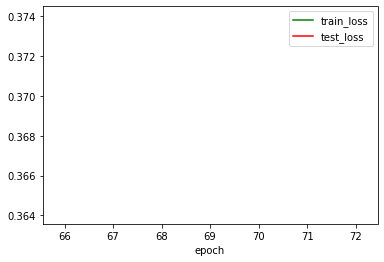

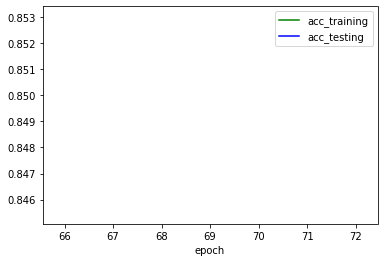

------Epoch [71/70], Batch [10], Loss: 0.5103
------Epoch [71/70], Batch [20], Loss: 0.1693
------Epoch [71/70], Batch [30], Loss: 0.4164
------Epoch [71/70], Batch [40], Loss: 0.2147
------Epoch [71/70], Batch [50], Loss: 0.7287
------Epoch [71/70], Batch [60], Loss: 0.5297
------Epoch [71/70], Batch [70], Loss: 0.3469
------Epoch [71/70], Batch [80], Loss: 0.3508
------Epoch [71/70], Batch [90], Loss: 0.4550
------Epoch [71/70], Batch [100], Loss: 0.4082
------Epoch [71/70], Batch [110], Loss: 0.2319
------Epoch [71/70], Batch [120], Loss: 0.6605
------Epoch [71/70], Batch [130], Loss: 0.3971
------Epoch [71/70], Batch [140], Loss: 0.4765
------Epoch [71/70], Batch [150], Loss: 0.3211
------Epoch [71/70], Batch [160], Loss: 0.4135
------Epoch [71/70], Batch [170], Loss: 0.2698
------Epoch [71/70], Batch [180], Loss: 0.4246
------Epoch [71/70], Batch [190], Loss: 0.2275
------Epoch [71/70], Batch [200], Loss: 0.3487
------Epoch [71/70], Batch [210], Loss: 0.3255
------Epoch [71/70], B

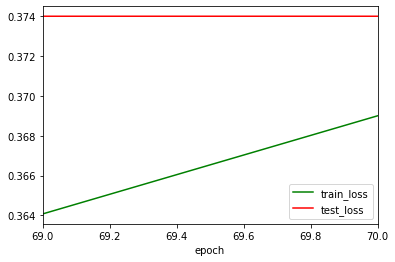

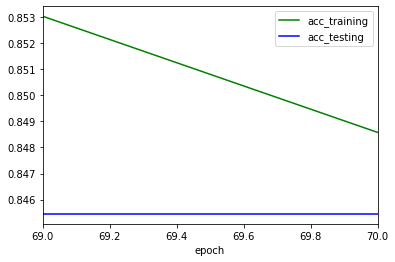

------Epoch [72/70], Batch [10], Loss: 0.2696
------Epoch [72/70], Batch [20], Loss: 0.3228
------Epoch [72/70], Batch [30], Loss: 0.4742
------Epoch [72/70], Batch [40], Loss: 0.2778
------Epoch [72/70], Batch [50], Loss: 0.3298
------Epoch [72/70], Batch [60], Loss: 0.3177
------Epoch [72/70], Batch [70], Loss: 0.1988
------Epoch [72/70], Batch [80], Loss: 0.4056
------Epoch [72/70], Batch [90], Loss: 0.7654
------Epoch [72/70], Batch [100], Loss: 0.3260
------Epoch [72/70], Batch [110], Loss: 0.2716
------Epoch [72/70], Batch [120], Loss: 0.5159
------Epoch [72/70], Batch [130], Loss: 0.2893
------Epoch [72/70], Batch [140], Loss: 0.2821
------Epoch [72/70], Batch [150], Loss: 0.2299
------Epoch [72/70], Batch [160], Loss: 0.4430
------Epoch [72/70], Batch [170], Loss: 0.2628
------Epoch [72/70], Batch [180], Loss: 0.4139
------Epoch [72/70], Batch [190], Loss: 0.1720
------Epoch [72/70], Batch [200], Loss: 0.2741
------Epoch [72/70], Batch [210], Loss: 0.3945
------Epoch [72/70], B

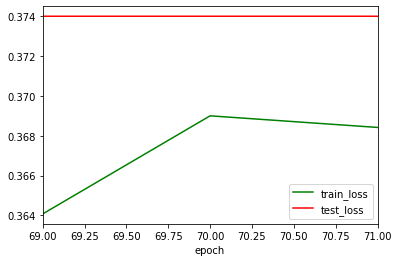

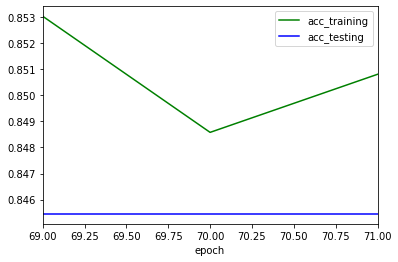

------Epoch [73/70], Batch [10], Loss: 0.1906
------Epoch [73/70], Batch [20], Loss: 0.4136
------Epoch [73/70], Batch [30], Loss: 0.2845
------Epoch [73/70], Batch [40], Loss: 0.4513
------Epoch [73/70], Batch [50], Loss: 0.3884
------Epoch [73/70], Batch [60], Loss: 0.2730
------Epoch [73/70], Batch [70], Loss: 0.7476
------Epoch [73/70], Batch [80], Loss: 0.3198
------Epoch [73/70], Batch [90], Loss: 0.2350
------Epoch [73/70], Batch [100], Loss: 0.3411
------Epoch [73/70], Batch [110], Loss: 0.4639
------Epoch [73/70], Batch [120], Loss: 0.3022
------Epoch [73/70], Batch [130], Loss: 0.4047
------Epoch [73/70], Batch [140], Loss: 0.4964
------Epoch [73/70], Batch [150], Loss: 0.5514
------Epoch [73/70], Batch [160], Loss: 0.3689
------Epoch [73/70], Batch [170], Loss: 0.3751
------Epoch [73/70], Batch [180], Loss: 0.3959
------Epoch [73/70], Batch [190], Loss: 0.2912
------Epoch [73/70], Batch [200], Loss: 0.3527
------Epoch [73/70], Batch [210], Loss: 0.4358
------Epoch [73/70], B

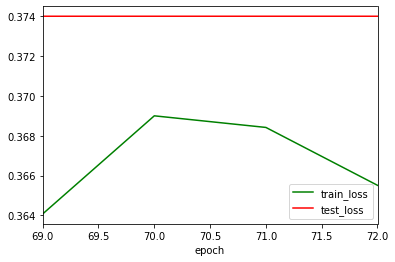

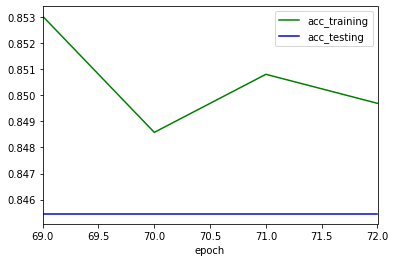

------Epoch [74/70], Batch [10], Loss: 0.2851
------Epoch [74/70], Batch [20], Loss: 0.3396
------Epoch [74/70], Batch [30], Loss: 0.3173
------Epoch [74/70], Batch [40], Loss: 0.2292
------Epoch [74/70], Batch [50], Loss: 0.6643
------Epoch [74/70], Batch [60], Loss: 0.3425
------Epoch [74/70], Batch [70], Loss: 0.4869
------Epoch [74/70], Batch [80], Loss: 0.3470
------Epoch [74/70], Batch [90], Loss: 0.3200
------Epoch [74/70], Batch [100], Loss: 0.2318
------Epoch [74/70], Batch [110], Loss: 0.3220
------Epoch [74/70], Batch [120], Loss: 0.2321
------Epoch [74/70], Batch [130], Loss: 0.2432
------Epoch [74/70], Batch [140], Loss: 0.3809
------Epoch [74/70], Batch [150], Loss: 0.4362
------Epoch [74/70], Batch [160], Loss: 0.5053
------Epoch [74/70], Batch [170], Loss: 0.1596
------Epoch [74/70], Batch [180], Loss: 0.6289
------Epoch [74/70], Batch [190], Loss: 0.3617
------Epoch [74/70], Batch [200], Loss: 0.4587
------Epoch [74/70], Batch [210], Loss: 0.3960
------Epoch [74/70], B

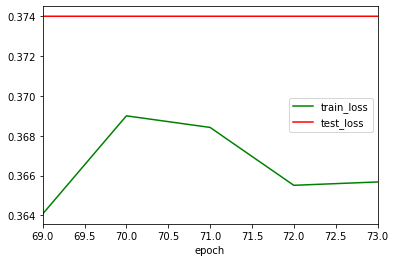

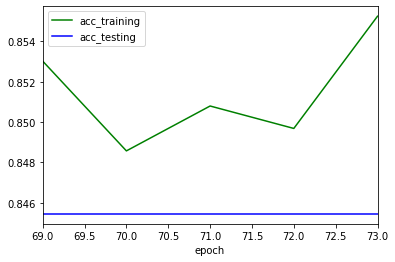

------Epoch [75/70], Batch [10], Loss: 0.2422
------Epoch [75/70], Batch [20], Loss: 0.7345
------Epoch [75/70], Batch [30], Loss: 0.3191
------Epoch [75/70], Batch [40], Loss: 0.3946
------Epoch [75/70], Batch [50], Loss: 0.4175
------Epoch [75/70], Batch [60], Loss: 0.2753
------Epoch [75/70], Batch [70], Loss: 0.1831
------Epoch [75/70], Batch [80], Loss: 0.2617
------Epoch [75/70], Batch [90], Loss: 0.2675
------Epoch [75/70], Batch [100], Loss: 0.2686
------Epoch [75/70], Batch [110], Loss: 0.3820
------Epoch [75/70], Batch [120], Loss: 0.5070
------Epoch [75/70], Batch [130], Loss: 0.2560
------Epoch [75/70], Batch [140], Loss: 0.5754
------Epoch [75/70], Batch [150], Loss: 0.4805
------Epoch [75/70], Batch [160], Loss: 0.5042
------Epoch [75/70], Batch [170], Loss: 0.1904
------Epoch [75/70], Batch [180], Loss: 0.3775
------Epoch [75/70], Batch [190], Loss: 0.5687
------Epoch [75/70], Batch [200], Loss: 0.3580
------Epoch [75/70], Batch [210], Loss: 0.2207
------Epoch [75/70], B

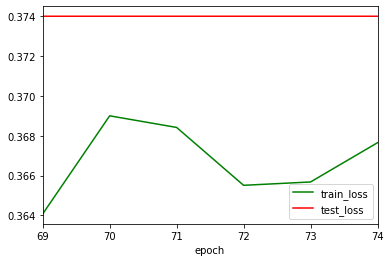

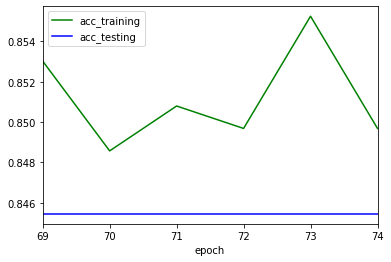

------Epoch [76/70], Batch [10], Loss: 0.3204
------Epoch [76/70], Batch [20], Loss: 0.3250
------Epoch [76/70], Batch [30], Loss: 0.1951
------Epoch [76/70], Batch [40], Loss: 0.5940
------Epoch [76/70], Batch [50], Loss: 0.4125
------Epoch [76/70], Batch [60], Loss: 0.2408
------Epoch [76/70], Batch [70], Loss: 0.3322
------Epoch [76/70], Batch [80], Loss: 0.5448
------Epoch [76/70], Batch [90], Loss: 0.3070
------Epoch [76/70], Batch [100], Loss: 0.2336
------Epoch [76/70], Batch [110], Loss: 0.3998
------Epoch [76/70], Batch [120], Loss: 0.2030
------Epoch [76/70], Batch [130], Loss: 0.3633
------Epoch [76/70], Batch [140], Loss: 0.2087
------Epoch [76/70], Batch [150], Loss: 0.5102
------Epoch [76/70], Batch [160], Loss: 0.3493
------Epoch [76/70], Batch [170], Loss: 0.5741
------Epoch [76/70], Batch [180], Loss: 0.2717
------Epoch [76/70], Batch [190], Loss: 0.2387
------Epoch [76/70], Batch [200], Loss: 0.5815
------Epoch [76/70], Batch [210], Loss: 0.3605
------Epoch [76/70], B

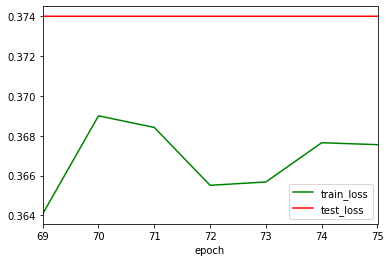

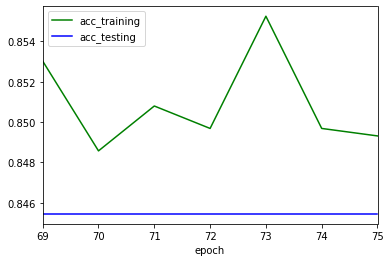

------Epoch [77/70], Batch [10], Loss: 0.4075
------Epoch [77/70], Batch [20], Loss: 0.4111
------Epoch [77/70], Batch [30], Loss: 0.2798
------Epoch [77/70], Batch [40], Loss: 0.3345
------Epoch [77/70], Batch [50], Loss: 0.2581
------Epoch [77/70], Batch [60], Loss: 0.3080
------Epoch [77/70], Batch [70], Loss: 0.4216
------Epoch [77/70], Batch [80], Loss: 0.5598
------Epoch [77/70], Batch [90], Loss: 0.1959
------Epoch [77/70], Batch [100], Loss: 0.5725
------Epoch [77/70], Batch [110], Loss: 0.1962
------Epoch [77/70], Batch [120], Loss: 0.2723
------Epoch [77/70], Batch [130], Loss: 0.3606
------Epoch [77/70], Batch [140], Loss: 0.2624
------Epoch [77/70], Batch [150], Loss: 0.4650
------Epoch [77/70], Batch [160], Loss: 0.2655
------Epoch [77/70], Batch [170], Loss: 0.3881
------Epoch [77/70], Batch [180], Loss: 0.3452
------Epoch [77/70], Batch [190], Loss: 0.4041
------Epoch [77/70], Batch [200], Loss: 0.3685
------Epoch [77/70], Batch [210], Loss: 0.3877
------Epoch [77/70], B

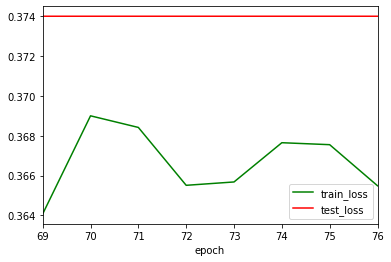

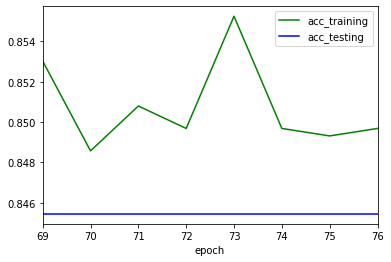

------Epoch [78/70], Batch [10], Loss: 0.3295
------Epoch [78/70], Batch [20], Loss: 0.2284
------Epoch [78/70], Batch [30], Loss: 0.5104
------Epoch [78/70], Batch [40], Loss: 0.3241
------Epoch [78/70], Batch [50], Loss: 0.2581
------Epoch [78/70], Batch [60], Loss: 0.3199
------Epoch [78/70], Batch [70], Loss: 0.6196
------Epoch [78/70], Batch [80], Loss: 0.4627
------Epoch [78/70], Batch [90], Loss: 0.5419
------Epoch [78/70], Batch [100], Loss: 0.3438
------Epoch [78/70], Batch [110], Loss: 0.4369
------Epoch [78/70], Batch [120], Loss: 0.3085
------Epoch [78/70], Batch [130], Loss: 0.2181
------Epoch [78/70], Batch [140], Loss: 0.5523
------Epoch [78/70], Batch [150], Loss: 0.2299
------Epoch [78/70], Batch [160], Loss: 0.2198
------Epoch [78/70], Batch [170], Loss: 0.3850
------Epoch [78/70], Batch [180], Loss: 0.2134
------Epoch [78/70], Batch [190], Loss: 0.2473
------Epoch [78/70], Batch [200], Loss: 0.4217
------Epoch [78/70], Batch [210], Loss: 0.4486
------Epoch [78/70], B

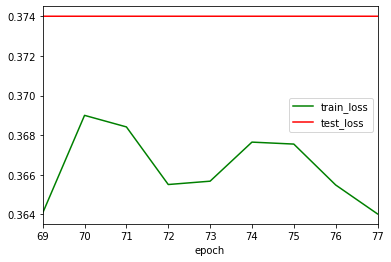

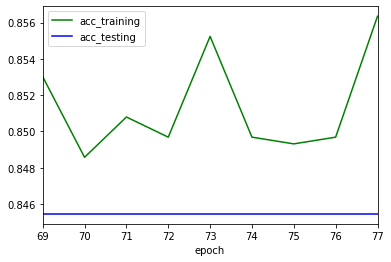

------Epoch [79/70], Batch [10], Loss: 0.4589
------Epoch [79/70], Batch [20], Loss: 0.3745
------Epoch [79/70], Batch [30], Loss: 0.1544
------Epoch [79/70], Batch [40], Loss: 0.2163
------Epoch [79/70], Batch [50], Loss: 0.4725
------Epoch [79/70], Batch [60], Loss: 0.4901
------Epoch [79/70], Batch [70], Loss: 0.2392
------Epoch [79/70], Batch [80], Loss: 0.2694
------Epoch [79/70], Batch [90], Loss: 0.3678
------Epoch [79/70], Batch [100], Loss: 0.4566
------Epoch [79/70], Batch [110], Loss: 0.6697
------Epoch [79/70], Batch [120], Loss: 0.3926
------Epoch [79/70], Batch [130], Loss: 0.2956
------Epoch [79/70], Batch [140], Loss: 0.3092
------Epoch [79/70], Batch [150], Loss: 0.4421
------Epoch [79/70], Batch [160], Loss: 0.3820
------Epoch [79/70], Batch [170], Loss: 0.5695
------Epoch [79/70], Batch [180], Loss: 0.3094
------Epoch [79/70], Batch [190], Loss: 0.2686
------Epoch [79/70], Batch [200], Loss: 0.1593
------Epoch [79/70], Batch [210], Loss: 0.3872
------Epoch [79/70], B

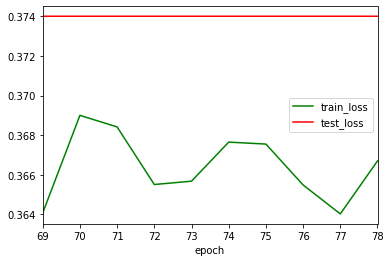

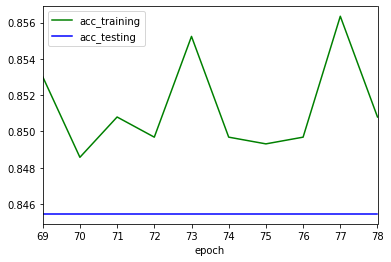

------Epoch [80/70], Batch [10], Loss: 0.3861
------Epoch [80/70], Batch [20], Loss: 0.3022
------Epoch [80/70], Batch [30], Loss: 0.3622
------Epoch [80/70], Batch [40], Loss: 0.5812
------Epoch [80/70], Batch [50], Loss: 0.5747
------Epoch [80/70], Batch [60], Loss: 0.2926
------Epoch [80/70], Batch [70], Loss: 0.4094
------Epoch [80/70], Batch [80], Loss: 0.4360
------Epoch [80/70], Batch [90], Loss: 0.4589
------Epoch [80/70], Batch [100], Loss: 0.3751
------Epoch [80/70], Batch [110], Loss: 0.2457
------Epoch [80/70], Batch [120], Loss: 0.1993
------Epoch [80/70], Batch [130], Loss: 0.3817
------Epoch [80/70], Batch [140], Loss: 0.2914
------Epoch [80/70], Batch [150], Loss: 0.2421
------Epoch [80/70], Batch [160], Loss: 0.2171
------Epoch [80/70], Batch [170], Loss: 0.4930
------Epoch [80/70], Batch [180], Loss: 0.3542
------Epoch [80/70], Batch [190], Loss: 0.3147
------Epoch [80/70], Batch [200], Loss: 0.2532


In [ ]:
LR = 0.000001
T = 70
indexT = 69

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

optim = torch.optim.Adam(model.parameters(), lr=LR)
costf = torch.nn.CrossEntropyLoss()

#LOAD_PATH = "/content/drive/My Drive/colab_notebooks/data/models/model7/model-classifier_181.pt"
SAVE_PATH = "/content/drive/My Drive/colab_notebooks/data/models/model11/modelb-"
LOAD_PATH = "/content/drive/My Drive/colab_notebooks/data/models/model11/model-classifier_69.pt"

model = ConvNet(2).to(device)
model.load_state_dict(torch.load(LOAD_PATH))


create_model_info(model)

empty = {"learning_rate":[],
        "batch": [],
        "Epochs":[] }
row = {"learning_rate":LR,
        "batch": B,
        "Epochs": T}

df = pd.DataFrame(empty)
df = df.append(row,  ignore_index=True)
df.to_csv(SAVE_PATH+"parameters.csv")

df = create_dataframe()

train_loss = 0
test_loss = 0
accuracy = 0

for t in range(T):
  #TRAIN
  model.train()
  run_loss = 0
  j = 0
  correct = 0
  total = 0

  for i, (images, labels) in enumerate(train_loader):
    images = images.to(device)
    labels = labels.to(device)

    optim.zero_grad()

    output = model(images)
    error = costf(output, labels)
     
    error.backward()
    optim.step()

    #print statistics 
    run_loss += error.item()
    j += 1

    _, predicted = torch.max(output.data, 1) 
    correct += (predicted == labels).sum().item()
    total += labels.size(0)

    if(i+1)%10 == 0: 
      print ( "------Epoch [{}/{}], Batch [{}], Loss: {:.4f}"
        .format( indexT+1, T, i+1, error.item())) 
    

  train_loss = run_loss/j
  acc_training = correct/total
  
  print( "Accuracy training: {} %".format(100*correct/total))
  print ( "Training - Epoch [{}/{}], Loss: {:.4f}"
    .format( indexT+1, T, train_loss)) 
      
  #TEST
  class_correct = list(0. for i in range(2))
  class_total = list(0. for i in range(2))

  model.eval()    
  with torch.no_grad():
    correct = 0
    total = 0
    run_loss = 0
    j = 0

    for images, labels in test_loader:
      images = images.to(device)
      labels = labels.to(device)

      output = model(images)
      error = costf(output, labels)

      run_loss += error.item()
      j += 1

      #print statistics 
      _, predicted = torch.max(output.data, 1) 
      correct += (predicted == labels).sum().item()
      c = (predicted == labels).squeeze()
      total += labels.size(0)
      for i in range(2):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

    test_loss = run_loss/j
    acc_testing = correct/total
    print ( "Testing - Epoch [{}/{}], Loss: {:.4f}"
      .format( indexT+1, T,  test_loss)) 
      

    print( "Accuracy test: {} %".format(100*correct/total))

  for i in range(2):
    print('Testing - Accuracy of %5s : %2d %%' % (
      classes[i], 100 * class_correct[i] / class_total[i])) 
    
  acc_benign  = class_correct[0] / class_total[0]
  acc_malign  = class_correct[1] / class_total[1]

  df = df.append(create_row(indexT, train_loss, test_loss, acc_training, acc_testing,acc_benign, acc_malign), ignore_index=True)
  indexT +=1
  #if((acc_benign>0.87 and acc_malign>0.87) or acc_testing>0.85):
    #save_model(indexT)
    #print("MODEL SAVED")

  make_graph(df)

df.to_csv(SAVE_PATH+"report.csv")

In [ ]:
df.to_csv(SAVE_PATH+"report.csv")

# Visualization

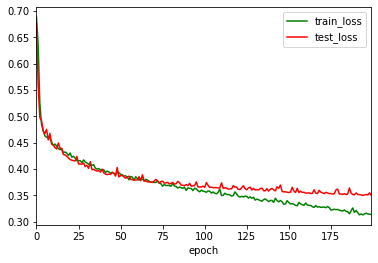

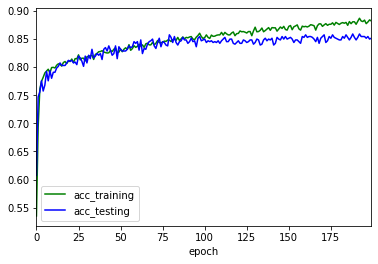

In [ ]:
LOAD_PATH = "/content/drive/My Drive/colab_notebooks/data/models/model7/"

import pandas as pd

df = pd.read_csv(LOAD_PATH+'report.csv')

make_graph(df)

# Use model

In [ ]:
LOAD_PATH = "/content/drive/My Drive/colab_notebooks/data/models/model7/model-classifier_181.pt"
#LOAD_PATH = "/content/drive/My Drive/colab_notebooks/data/models/model9/model-classifier_66.pt"

model = ConvNet(2)
model.load_state_dict(torch.load(LOAD_PATH))

<All keys matched successfully>

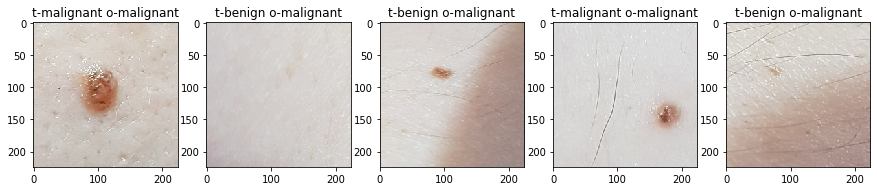

In [ ]:
w=60
h=40
fig=plt.figure(figsize=(15, 15))
columns = 5
rows = 1

dataiter = iter(test_loader)

images, labels = dataiter.next()

output = model(images)

_, predicted = torch.max(output.data, 1) 

for i in range(1, columns*rows+1):
    ax = fig.add_subplot(rows, columns, i)    
    ax.title.set_text("t-"+ classes[labels[i-1]] +" o-"+ classes[predicted[i-1]] )
    imshow(images[i-1])
plt.show()

In [ ]:
model.eval()    

class_correct = list(0. for i in range(2))
class_total = list(0. for i in range(2))
with torch.no_grad():
  correct = 0
  total = 0
  run_loss = 0
  j = 0

  for images, labels in test_loader:
    images = images
    labels = labels

    output = model(images)
    
    j += 1

    #print statistics 
    _, predicted = torch.max(output.data, 1) 
    correct += (predicted == labels).sum().item()
    c = (predicted == labels).squeeze()
    total += labels.size(0)
    for i in range(2):
      label = labels[i]
      class_correct[label] += c[i].item()
      class_total[label] += 1
  
  print(correct)
  print(total)
  acc_testing = correct/total
  
  print( "Accuracy test: {} %".format(100*correct/total))

  for i in range(2):
    print('Testing - Accuracy of %5s : %2d %%' % (
      classes[i], 100 * class_correct[i] / class_total[i])) 




IndexError: ignored

In [ ]:
model.eval()    

class_correct = list(0. for i in range(2))
class_total = list(0. for i in range(2))
with torch.no_grad():
  correct = 0
  total = 0
  run_loss = 0
  j = 0

  for images, labels in test_loader:
    images = images
    labels = labels

    output = model(images)
    
    j += 1

    #print statistics 
    _, predicted = torch.max(output.data, 1) 
    correct += (predicted == labels).sum().item()
    c = (predicted == labels).squeeze()
